# SMU 7331 Data Mining Project 1
##### Authors: Shon Mohsin, Heber Nielsen, Jose Torres, Lokesh Maganti

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix, parallel_coordinates
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Business Understanding:

Our selected data set was chosen because we had an interest in the subject matter written about in the following paper: _["Effects of earthquake on perinatal outcomes: A Chilean register-based study"](https://github.com/ShonTM/DataMiningProject1/blob/master/chile%20earthquake%20plos%20one%20paper.pdf)_  by Yasna K, et al. The paper looks for the effect of the February 27, 2010 earthquake that occured in Chile and the perinatal outcomes of Chilean pregnant women to determine if there was an effect of the earthquake on the babies' vital statistics. 

For this project, we visualize the dataset used and use exploratory data analysis to identify cursory meaning from the visualizations. We create summary statistics to derive high-level opportunities for further analysis. 

Useful knowledge represents differences in the visualizations that identify changes in the babies' vital statistics due to exposure to the earthquake.

We can measure effectiveness of a good prediction algorithm by examining model performance metrics such as accuracy, precision, or recall (if classification model), or R^2/AIC/BIC values (regression model).  One useful target variable from this data set is exposure.

### Data Collection Process:

The following description of the data gathering process is from the paper describing the data quality:

All demographic and clinical information was abstracted and recorded by professional workers (medical doctors, midwives, and nurses). The data abstracted included: date of delivery, gestational age at delivery (in weeks), maternal age (in years), parity of mother, the location of residence, the gender of newborns, birth weight (in grams), length (in centimeters), head circumference (in centimeters), Apgar at 5 minutes, and small for gestational age (SGA) (defined as newborn birth weight <10th percentile for gestational age). Perinatal outcomes measured included: birth weight, length, ponderal index (weight/height3), head circumference, Apgar at 5 minutes, the proportion of SGA newborns, preterm delivery (birth between 34–37 weeks). Gender of newborns, location of residence, gestational age (either in weeks or days), parity and maternal age were considered as effect modifiers; location of residence was related to three categories of average annual income: low income (500,000 to 1 million Chilean pesos), middle income (1 to 1.5 million Chilean pesos) and high income (more than 1.5 million Chilean pesos).  

### Data Preparation

The columns are converted to their english values as described in the Data Overview section. The conversion is done directly to the csv file using excel and find and replace functions for the class variables. 

## Data Features ##

| Feature Name (Original)       | Feature Name (English) | Description               | Variable Type                |
| -----------------------------:| ----------------------:|--------------------------:|-----------------------------:|
| id_clinica                    | Clinic_ID              | ID# of the medical clinic | numeric                      |
| id_excel                      | Excel_File_ID          | ID# in original source    |                              |
| dia                           | Day                    | Day in birth month        | numeric                      |
| mes                           | Month                  | Birth month               | numeric                      |
| ano                           | Year                   | Birth year                | numeric                      |
| sex                           | Sex                    | Birth sex (Mujer/Hombre)  | numeric                      |
| peso                          | Weight                 | Birth weight in grams| numeric                           |
| talla                         | Length                 | Birth length in cm        | numeric                      |
| cc                            | Head_circ              | Head circumference in cm (eyebrow level) | numeric       |
| apgar                         | Apgar_1                | Apgar score 1 minute after birth | numeric               |
| apgar5                        | Apgar_5                | Apgar score 5 minutes after birth | numeric              |
| comuna                        | Municipality           | Avg. annual income in Chilean Pesos | numeric            |
| aeg                           | wgt_for_age            | Weight relative to gestational age | Categorical         |
| eg                            | Gest_age               | Gestational age at birth in weeks  | numeric             |
| trim_exp                      | Trimester              | Trimester when exposure occurred   | numeric             |
| bajo_peso                     | Low_bthwgt             | Indicator for weight under 2500 grams | Categorical      |
| pretermino                    | Premature              | Indicator for gestation period less than 37 weeks | Categorical  |
| edad_mama                     | Maternal_Age           | Age of mother in years    | numeric                      |
| paridad                       | Parity                 | Number of previous live births by same mother | numeric  |
| trim_exp_g                    | Trim_study             | Trimester of the control or exposure year (1-6)   | Categorical |
| pi                            | Pondural Index         | Score representing fetal growth | numeric                |
| exposed                       | Exposed                | Indicator of stress exposure that occurred during earthquake  | Categorical |

In [5]:
url = 'https://raw.githubusercontent.com/ShonTM/DataMiningProject1/master/Chilean%20Earthquake%20Perinatal%20Outcome_english_translation.csv' 
df=pd.read_csv(url)

## Data Quality

The discussion and cells below provide commentary on the quality of this data set.

### Missing Values
`Clinic_ID` and `Excel_File_ID` are dropped because they are not needed for analysis. Furthermore, the two `NaN` values in `Parity` are inputed with the most commonly observed value of 0.  Since 0 is the mode of `Parity`, we impute the two NaNs with 0.

### Duplicates

We found `0` duplicates in this data set (see next cell).

### Outliers

We identified 3 potential outliers based on the scatter plot below of `Weight` vs `Ponderal_index`.  These are newborns whose lengths were much smaller than typical given their weight (more than 4 standard deviations away from the mean).

In [6]:
#Data Cleanup - Dropping unnecessary columns, replacing NaNs, and fixing column names
print('Dropping columns Clinic_ID and Excel_File_ID...')
print('Replacing NaN values in \'Parity\' with 0...')
print('Renaming Lenght column to Length..')

#drop "Clinic_ID" and "Excel_File_ID" from dataframe
df.drop('Clinic_ID', axis=1, inplace=True, errors='ignore')
df.drop('Excel_File_ID', axis=1, inplace=True, errors='ignore')


#identify records with missing values
#display(df.iloc[df['Parity'].isna().get_values(),:].transpose() \
#           .style.highlight_null(null_color='red'))

#replace NaN in Parity with 0, which is the most common label
df['Parity'].fillna(0, inplace=True)


#rename length column
df.rename(columns={'Lenght': 'Length'}, inplace=True)

Dropping columns Clinic_ID and Excel_File_ID...
Replacing NaN values in 'Parity' with 0...
Renaming Lenght column to Length..


In [7]:
print('There are {} duplicated records.'.format(df.duplicated().sum()))

There are 0 duplicated records.


# Data Visualization and Visual Analysis #

Categorical variables identified: `Sex`, `Municipality`, `wgt_for_age`, `Trimester`, `Low_birthwgt`, `Premature`, `Trim_study`, `Parity`, `Exposed`, `Apgar_1`, `Apgar_5`, `Gest_age`

Continuous variables identified: `Weight`, `Length`, `Head_circ`, `Maternal_age`, `Ponderal_index`

In [8]:
#ignore some columns
columns_ignore = ['Day', 'Month', 'Year']
df_lite = df.drop(columns_ignore, axis=1)

#map some categorical variables to work with parallel coordinate plots and have a more natural ordering
df_lite['Sex'] = df_lite['Sex'].map({'female': 0, 'male': 1})
df_lite['Premature'] = df_lite['Premature'].map({'Premature': 1, 'Not premature': 0})
df_lite['Trim_study'] = df_lite['Trim_study'].map({'First2009': '1', 'Second2009': '2', 'Third2009': '3', 
                          'First2010': '4', 'Second2010': '5', 'Third2010': '6' })

#get list of categorical variables
categories = list(df_lite.columns[df_lite.dtypes == 'object']) \
                    + ['Parity', 'Apgar_1', 'Apgar_5', 'Exposed', 'Sex', 'Premature', 'Trim_study', 'Gest_age']
continuous = [col for col in df_lite.columns if col not in categories]

#confirm list of categorical variables
print('Categorical variables: {}\n'.format(categories))
print('Continuous variables: {}\n'.format(continuous))

#change data type for categorical variables to pandas 'category' type
df_lite[categories] = df_lite[categories].astype('category')

Categorical variables: ['Municipality', 'wgt_for_age', 'Trimester', 'Low_birthwgt', 'Trim_study', 'Parity', 'Apgar_1', 'Apgar_5', 'Exposed', 'Sex', 'Premature', 'Trim_study', 'Gest_age']

Continuous variables: ['Weight', 'Length', 'Head_circ', 'Maternal_age', 'Ponderal_index']



## Summary Statistics and Commentary ##

It is important to look at measurements of centrality and dispersion, such as mean and standard deviation, to help identify distributions and that observed values match prior expectations for those variables.

### Main Observations ###

Observations for continuous variables:
+ `weight` has much larger values (due to small unit of measure) as well as a larger range than the other continuous variables.  This should be normalized before fitting any statistical models that use distance-based measurements for error.

+ In the scatter plot matrix, there is evidence of symmetry in all continuous variables

Observations for categorical variables:
+ Most categorical variables have only a few categories (2 or 3)

In [223]:
print('Summary Statistics for Continuous Features:')
display(df_lite[continuous].describe())
print('Summary Statistics for Categorical Features:')
display(df_lite[categories].describe())

Summary Statistics for Continuous Features:


,Weight,Length,Head_circ,Maternal_age,Ponderal_index
count,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000
mean,3355.048086,49.696516,34.689463,27.839794,2.729498
std,384.896728,1.723517,1.187216,5.380683,0.228661
min,1790.000000,40.000000,29.000000,14.000000,1.696000
25%,3098.750000,48.500000,34.000000,24.000000,2.579992
50%,3345.000000,50.000000,35.000000,28.000000,2.717342
75%,3610.000000,51.000000,35.500000,31.000000,2.866328
max,4890.000000,56.000000,40.000000,44.000000,5.283747


Summary Statistics for Categorical Features:


,Municipality,wgt_for_age,Trimester,Low_birthwgt,Trim_study,Parity,Apgar_1,Apgar_5,Exposed,Sex,Premature,Trim_study,Gest_age
count,4076,4076,4076,4076,4076,4076.0,4076,4076,4076,4076,4076,4076,4076
unique,3,3,3,2,6,6.0,9,5,2,2,2,6,8
top,500-1mill,aeg,First,normal birthweight,4,0.0,9,9,1,0,0,4,39
freq,2280,3581,1371,4022,758,2203.0,3405,2456,2110,2087,3961,758,1612


### Correlation ###
- A few continuous variables appear approximately Normally distributed (e.g. `weight`, and `head_circ`), and all appear to be symmetric

- The correlation scores in the data frame below show strongest linear correlation for the following pairs:
 - corr(`weight`,`length`) = .72, 
 - corr(`weight`, `head_circ`) = .61
 - corr(`length`, `head_circ`) = .49
 - corr(`weight`, `ponderal_index`) = .49

In [224]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
display(df_lite.corr().style.background_gradient('coolwarm'))

,Weight,Length,Head_circ,Maternal_age,Ponderal_index
Weight,1,0.722646,0.607322,0.0611526,0.48568
Length,0.722646,1,0.486965,0.0488968,-0.246581
Head_circ,0.607322,0.486965,1,0.0667801,0.238798
Maternal_age,0.0611526,0.0488968,0.0667801,1,0.0211695
Ponderal_index,0.48568,-0.246581,0.238798,0.0211695,1


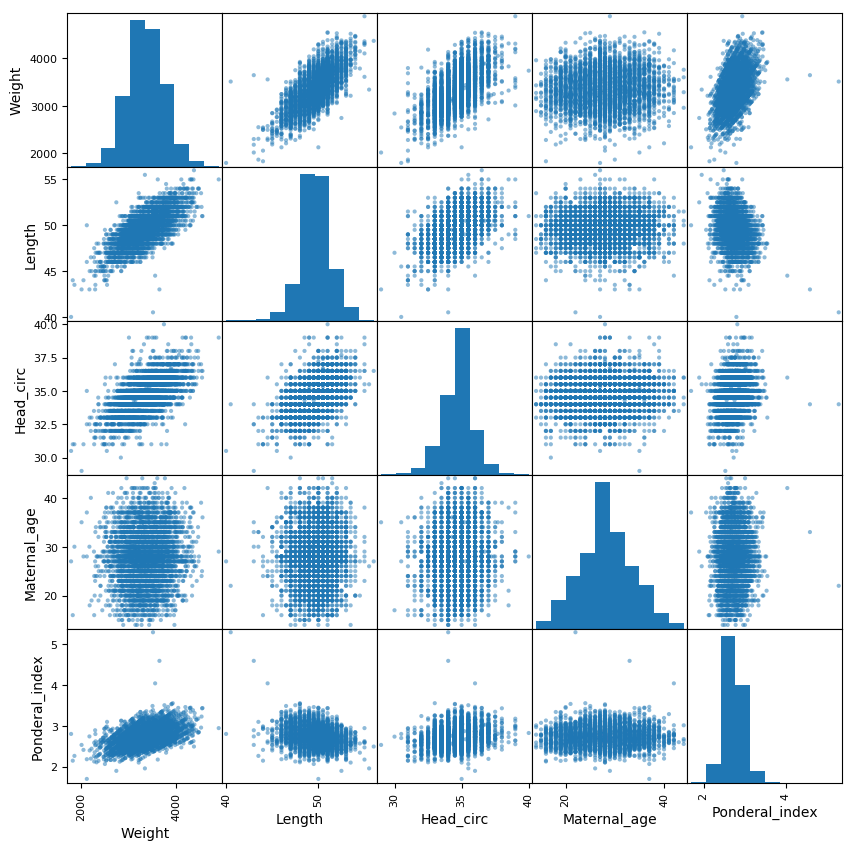

In [225]:
plt.style.use('default')
ax = scatter_matrix(df_lite,figsize=(10, 10))

If we look a littler closer at correlation using bivariate contour plots, we can see that there are a few cases with multiple density maxima, such as for `weight vs Head_circ` and `Head_circ` vs `Ponderal_index`.

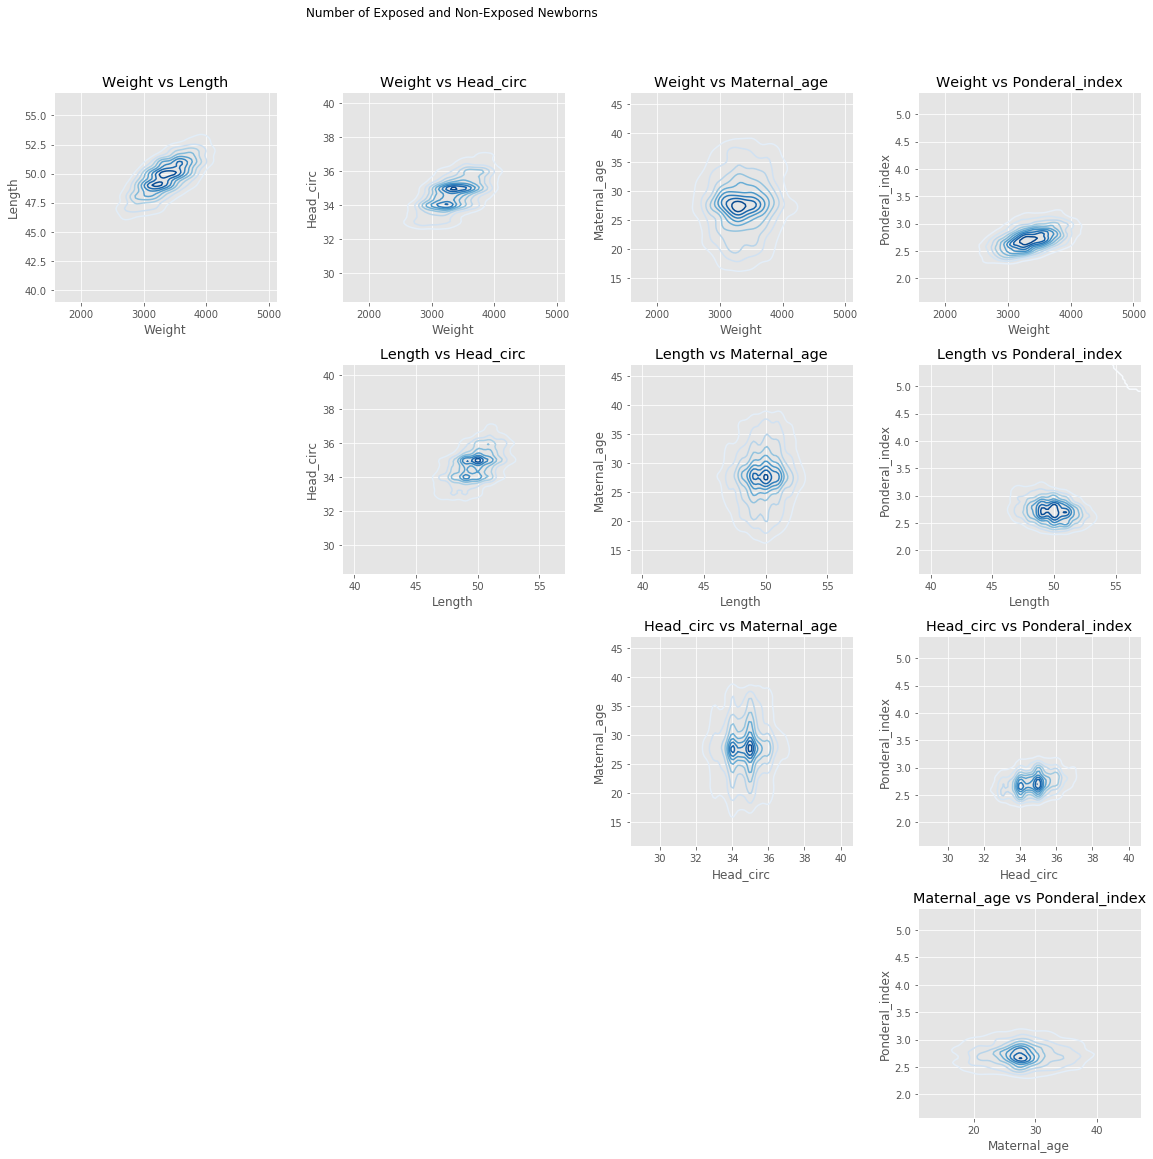

In [14]:
#Show how balanced the counts are across categorical variables
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
plt.style.use('ggplot')
#sns.set(style="white")
plt.suptitle('Number of Exposed and Non-Exposed Newborns')

for i in range(len(continuous)):
    for j in range(i+1, len(continuous)):
        sns.kdeplot(data=df_lite[continuous].iloc[:,i], 
                            data2=df_lite[continuous].iloc[:,j], ax=ax[i, j], shade_lowest=False, cmap='Blues')
        ax[i,j].set_title('{} vs {}'.format(continuous[i],continuous[j]))

#adjust tight_layout to avoid title clipping
fig.tight_layout(rect=[0, 0, 1, .94])

for i in range(5):
    for j in range(i+1):
        ax[i,j].set_visible(False)

plt.show()

### Revisiting Outliers ###

As mentioned above in the Outlier section, there are 3 possible outliers most prevalently seen in the `weight` vs `Ponderal_index` scatterplot.  These are newborns whose lengths were much smaller than typical given their weight (more than 4 standard deviations away from the mean).  Since `Ponderal_index` is inversely proportional to Length^3, it is high for these 3 unusually short babies.

These potential outliers are identified in the plot below (in blue).

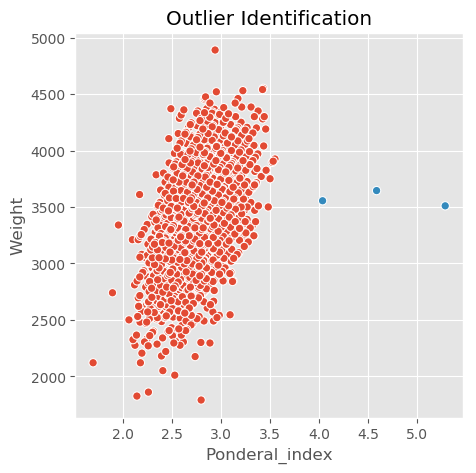

In [227]:
x = df_lite['Ponderal_index']
y = df_lite['Weight']
c = df_lite['Ponderal_index'] >= 4.0

plt.figure(figsize=(5,5))
plt.style.use('ggplot')

ax = sns.scatterplot(x,y,hue=c)
ax.legend().set_visible(False)
ax.set_title('Outlier Identification')
plt.show()

### Statistical Comparisons ###

We divide our buckets by the binary 'Exposed' column to see if there are visually discernable features that are evident between infants that were born before the earthquake or after the earthquake. 

Using the continuous variables defined at the top of this notebook, we can examine means, medians, and standard deviations by exposure group, as well as the differences in means.  We see that the % change in the mean of each variable for Exposed babies is a slight decrease for the newborn measurements, and an increase in maternal age and ponderal index. 

In [228]:
#mean values of target variables grouped by exposure to earthquake
summary_df = df_lite.groupby(by='Exposed').agg([np.mean, np.median, np.std]).transpose()
summary_df.columns = ['Not Exposed', 'Exposed']
summary_df['Difference'] = summary_df['Exposed'] - summary_df['Not Exposed']
summary_df['Difference %'] = summary_df['Difference'] / summary_df['Not Exposed'] * 100
summary_df.reset_index(inplace=True)
summary_df.columns = ['Variable', 'Statistic', 'Not Exposed', 'Exposed', 'Difference', 'Difference %']
summary_df

,Variable,Statistic,Not Exposed,Exposed,Difference,Difference %
0,Weight,mean,3358.002035,3352.295735,-5.706300,-0.169931
1,Weight,median,3345.000000,3345.000000,0.000000,0.000000
2,Weight,std,377.199664,392.001798,14.802134,3.924217
3,Length,mean,49.894354,49.512180,-0.382174,-0.765966
4,Length,median,50.000000,49.500000,-0.500000,-1.000000
5,Length,std,1.625441,1.790939,0.165497,10.181691
6,Head_circ,mean,34.752238,34.630972,-0.121266,-0.348946
7,Head_circ,median,35.000000,34.500000,-0.500000,-1.428571
8,Head_circ,std,1.166475,1.203553,0.037077,3.178593
9,Maternal_age,mean,27.573245,28.088152,0.514906,1.867413


When we look at the distribution of newborns for each category in `Sex`, `Wealth`, `Trimester`, and `Parity` variables, we see the non-exposed (red) and exposed (blue) classes are **balanced** across all categories of all variables.  

These plots are interpreted by first picking a categorical variable, say Sex, then pick a category, say Female.  Of all Females, the red bar represents the number that were exposed.  The blue bar is the number that were not exposed.

The fact that we see similar bar heights means the proportion of exposed newborns is similar to the proportion of non-exposed newborns.  Since this is true, we can trust that statistics computed for each category for exposed babies and non-exposed babies have a similar number of observations.

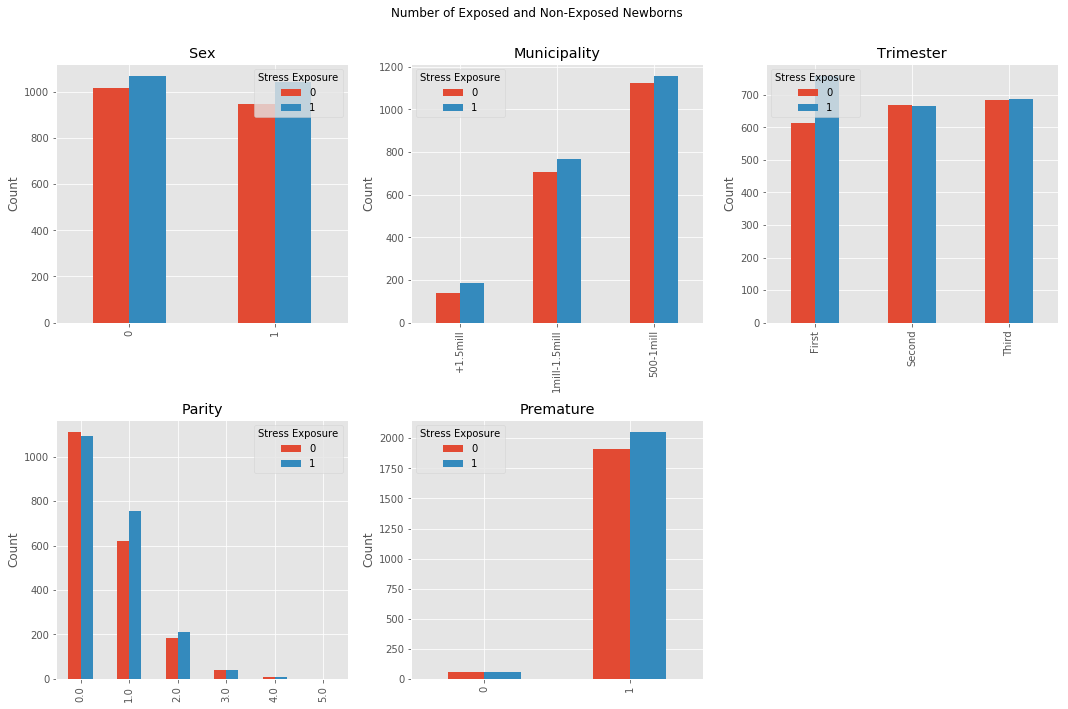

In [221]:
#Show how balanced the counts are across categorical variables
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
plt.style.use('ggplot')
plt.suptitle('Number of Exposed and Non-Exposed Newborns')

#plot each cross tabulation (% is relative to total newborns in a variable category)
independent_features = ['Sex', 'Municipality', 'Trimester', 'Parity', 'Premature']
for idx in range(len(independent_features)):
    row = int(idx / 3)
    col = int(idx % 3)
    pd.crosstab(index=df_lite[independent_features[idx]],columns=df_lite['Exposed'],
                colnames=['Stress Exposure']).plot(kind='bar', ax=ax[row,col])
    ax[row,col].set_ylabel('Count')
    ax[row,col].set_title(independent_features[idx])
    ax[row,col].set_xlabel('')

#adjust tight_layout to avoid title clipping
fig.tight_layout(rect=[0, 0, 1, .94])
ax[1,2].set_visible(False)

plt.show()

The distribution plots below show the continuous variables in a little more detail than the correlogram above.  `Weight` and `Ponderal_index` have the most bell-shaped curve, whereas the other variables either have too few unique values to really judge (`Length`, `Head_circ`), or do not appear to be shaped like a Normal distibution (`maternal_age`).

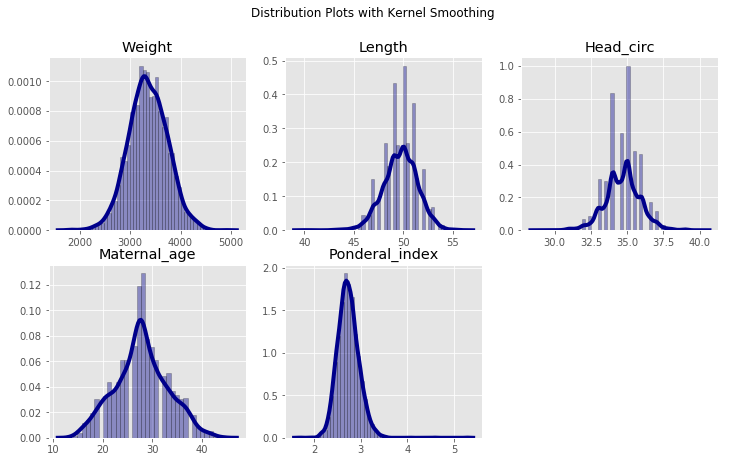

In [193]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,7))
plt.style.use('ggplot')
plt.suptitle('Distribution Plots with Kernel Smoothing')

#plot each cross tabulation (% is relative to total newborns in a variable category)
independent_features = continuous
for idx in range(len(independent_features)):
    row = int(idx / 3)
    col = int(idx % 3)
    sns.distplot(df_lite[independent_features].iloc[:,idx],
                               hist=True,kde=True,color='darkblue',
                               hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4}, ax=ax[row,col])
    ax[row,col].set_title(independent_features[idx])
    ax[row,col].set_xlabel('')

ax[1,2].set_visible(False)
#df_lite[continuous].apply(lambda x: plothist(x), axis=0)

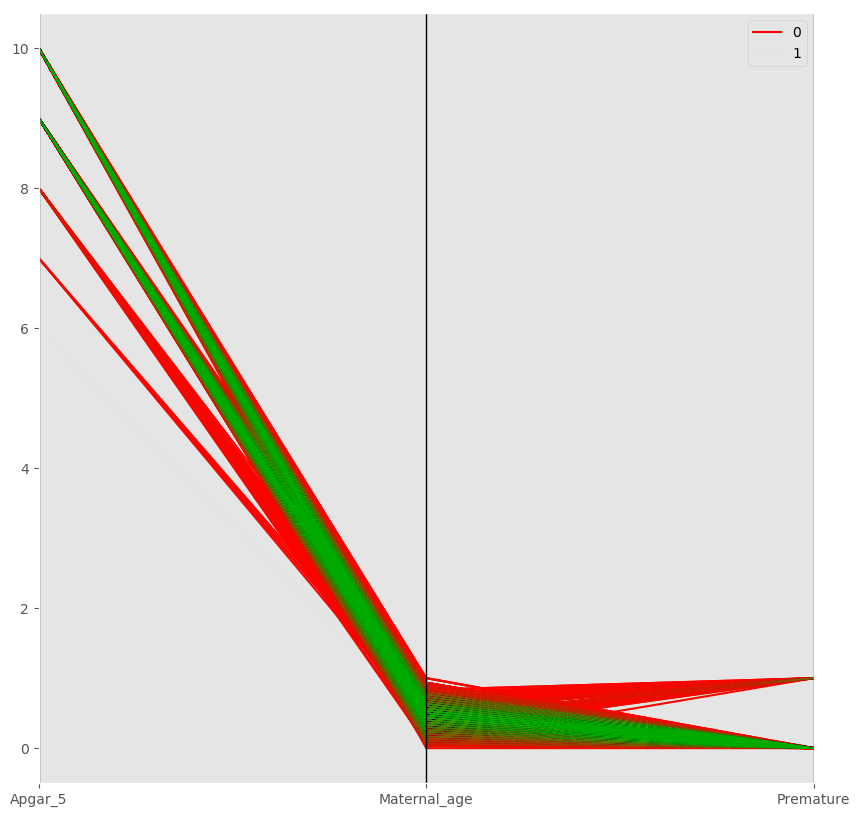

In [255]:
#######################################################################################
######This is by far the ugliest and most difficult to interpret visual, with any combination of variables. 
######It's terrible - Jose
########################################################################################

plt.close('all')
plt.figure(figsize=(10,10))

df_normalized = (df_lite[continuous] - df_lite[continuous].min()) / (df_lite[continuous].max() - df_lite[continuous].min())
df_normalized['Exposed'] = df_lite['Exposed']
df_normalized['Trim_study'] = df_lite['Trim_study']
df_normalized['Premature'] = df_lite['Premature']
#df_normalized['Sex'] = df_lite['Sex'].map({'female': 0, 'male': 1})
df_normalized['Apgar_5'] = df_lite['Apgar_5']
parallel_coordinates(df_normalized.loc[:,['Exposed', 'Apgar_5', 'Maternal_age', 'Premature']], 'Exposed',color=[[1,0,0,1],[0,1,0,.01]])

We compared box plots to understand the differences in weight categorized by trimester and sex.  Observing the box plot, we see two patterns:
+ Exposure in the second trimester produces more outliers in weight.
+ Exposed males tend to weigh less
+ Premature babies tend to weigh less than non-premature babies, with exposed premature babies appearing to weigh less than non-exposed premature babies

Next, we compared box plots to understand the differences in maternal age by trimester, baby's sex, and premature status.  Observing the box plot, we see two patterns:

+ Exposed babies tend to have older mothers than non-exposed babies
+ Premature exposed babies have a higher proportion of younger mothers than non-premature exposed babies

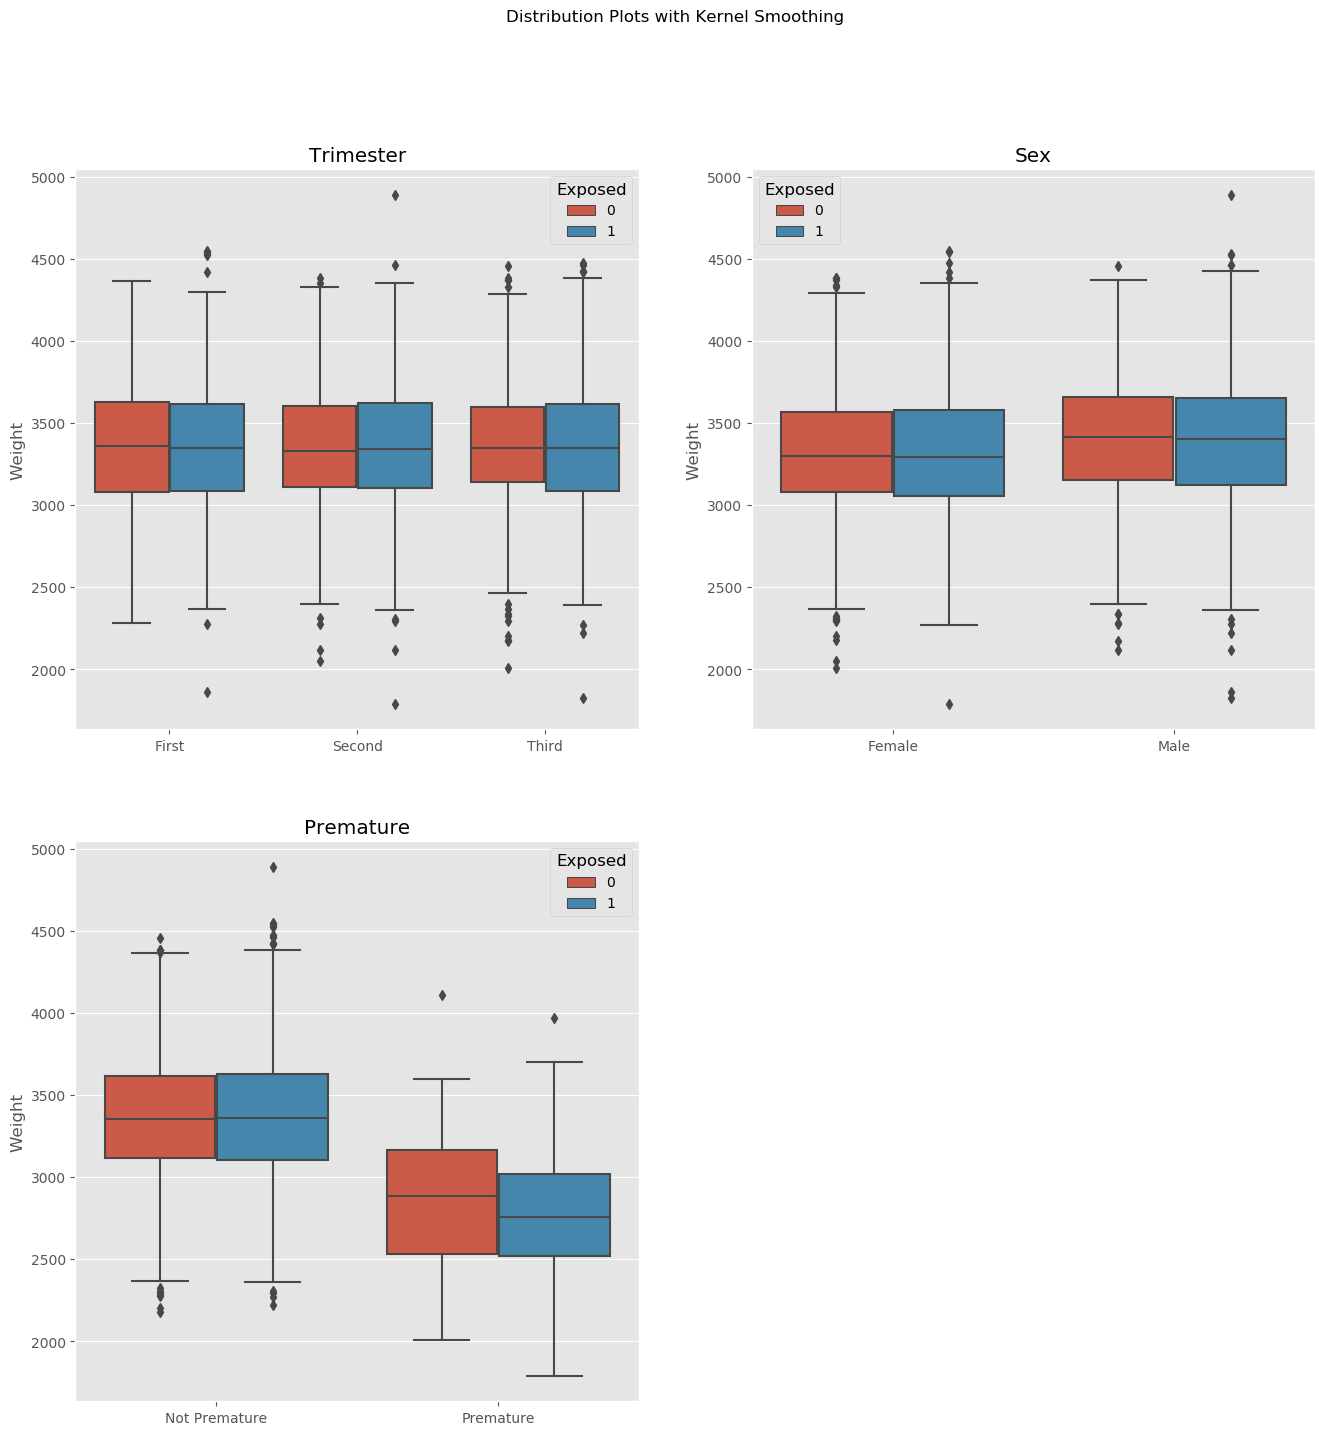

In [253]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
plt.style.use('ggplot')
plt.suptitle('Distribution Plots with Kernel Smoothing')

independent_features = ['Trimester', 'Sex', 'Premature']
for idx in range(len(independent_features)):
    row = int(idx / 2)
    col = int(idx % 2)
    sns.boxplot(x=independent_features[idx], y='Weight', hue='Exposed', data=df_lite, ax=ax[row,col])
    ax[row,col].set_title(independent_features[idx])
    ax[row,col].set_xlabel('')
    
ax[0,1].set_xticklabels(labels = ['Female','Male'])
ax[1,0].set_xticklabels(labels = ['Not Premature','Premature'])
ax[1,1].set_visible(False)
plt.show()

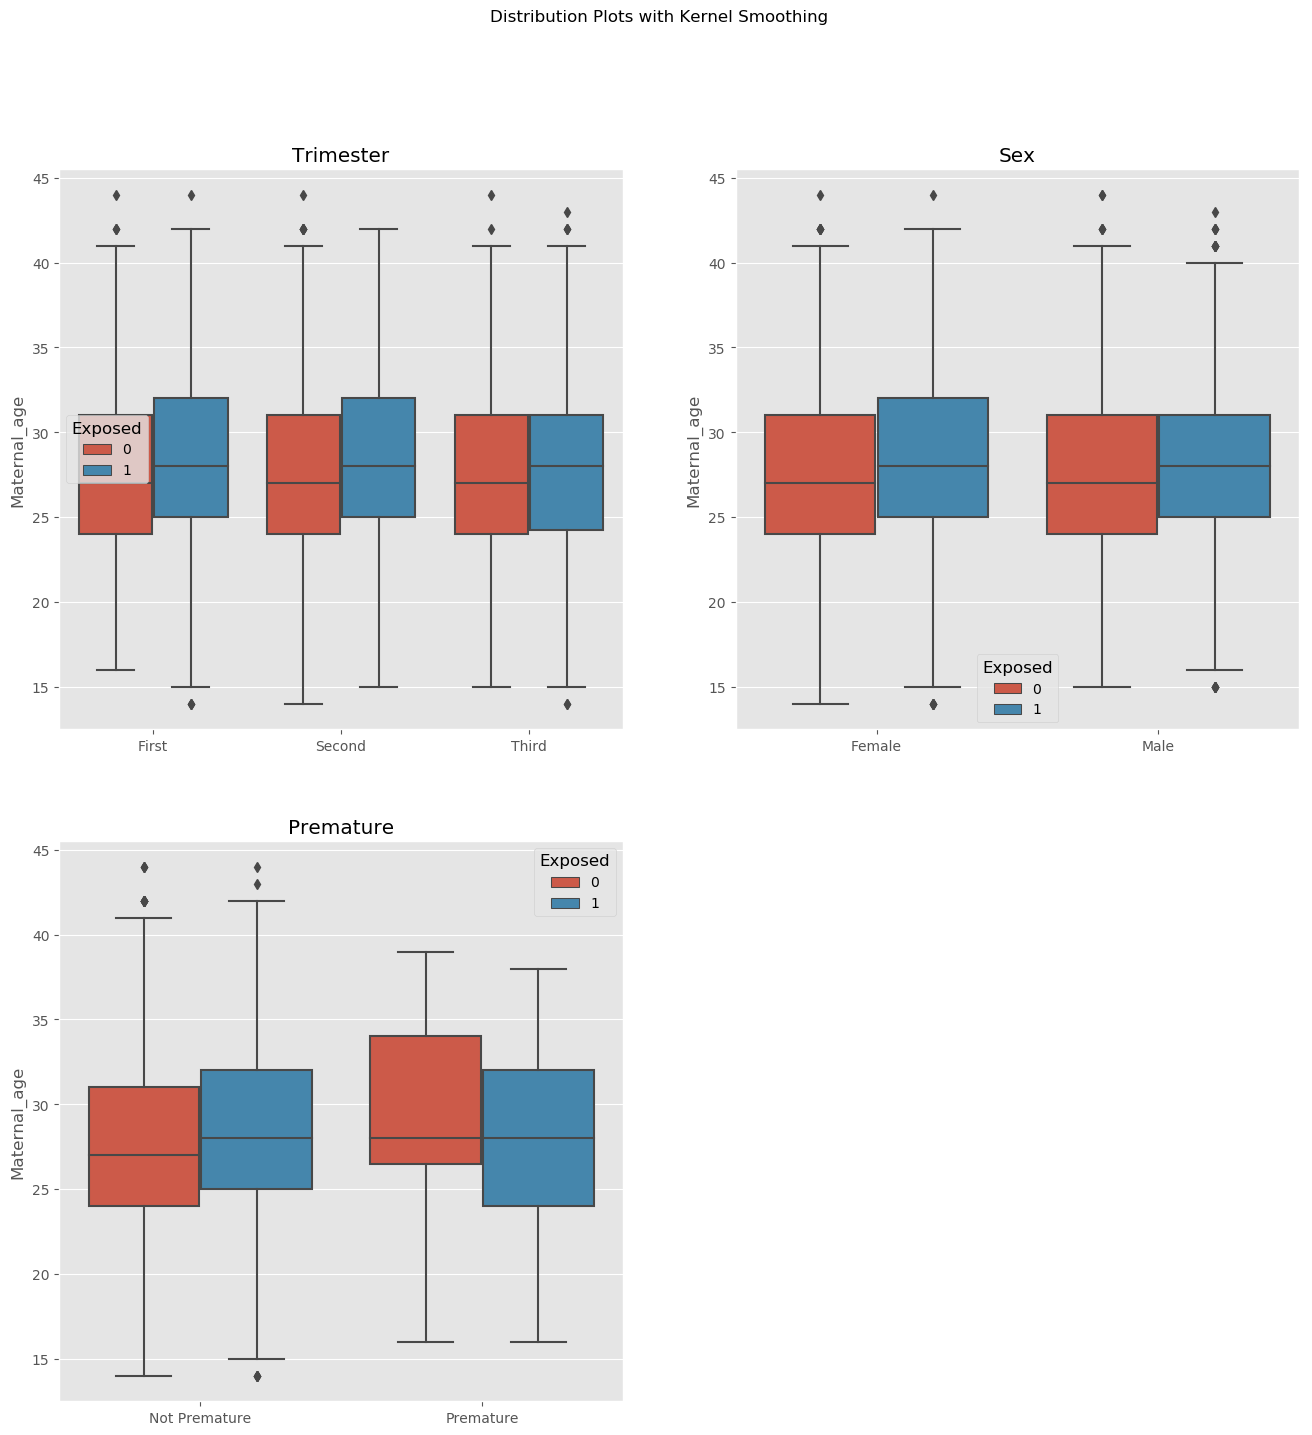

In [252]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
plt.style.use('ggplot')
plt.suptitle('Distribution Plots with Kernel Smoothing')

#plot each cross tabulation (% is relative to total newborns in a variable category)
independent_features = ['Trimester', 'Sex', 'Premature']
for idx in range(len(independent_features)):
    row = int(idx / 2)
    col = int(idx % 2)
    sns.boxplot(x=independent_features[idx], y='Maternal_age', hue='Exposed', data=df_lite, ax=ax[row,col])
    ax[row,col].set_title(independent_features[idx])
    ax[row,col].set_xlabel('')
    
ax[0,1].set_xticklabels(labels = ['Female','Male'])
ax[1,0].set_xticklabels(labels = ['Not Premature','Premature'])
ax[1,1].set_visible(False)
plt.show()

## Additional Features ##

Infant weight and length are used as inputs for the Ponderal index score.  
Other potential new features could be:
+ Discretizing some of the continuous variables into categories with larger differences (e.g. small/mid/large length)
+ Researching existing documentation on Apgar and identifying potential use of linear combinations of Apgar scores


In [9]:
df_lite.columns

Index(['Sex', 'Weight', 'Length', 'Head_circ', 'Apgar_1', 'Apgar_5',
       'Municipality', 'wgt_for_age', 'Gest_age', 'Trimester', 'Low_birthwgt',
       'Premature', 'Maternal_age', 'Parity', 'Trim_study', 'Ponderal_index',
       'Exposed'],
      dtype='object')

## Principal Components Visualizations ## 

In [10]:
###Redo the model, ask for 3 component model
features = ['Sex', 'Head_circ', 'apgar_1', 'Apgar_5', 'Municipality', 'Wgt_for_age', 'Gest_age', 
            'Trimester', 'Low_birthwgt', 'Premature', 'Maternal_age', 'Parity', 'Ponderal_index']
extra_features = ['Weight', 'Length']

X = df_lite.loc[:, features + extra_features].values
y = df_lite['Exposed'].values
X = StandardScaler().fit_transform(X)

#View our standardized data.
#Note that "pd.DataFrame" is a function, not a name of the data frame
#pd.DataFrame(data = x, columns = features).head()

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

/home/jat055000_gmail_com/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: could not convert string to float: '500-1mill'

In [ ]:
#PCA Projection to smaller number of variables
#I chose 2 components because only a 2-dimensional plot is being done.

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                          columns = ['principal component 1', 'principal component 2', 'Exposed'])

In [ ]:
##Visualize the Projection
#Use a PcA projection to 2D to visualize the entire data set.
#Plot different classes using different colors or shapes.
#Do the classes seem well-seperated from each other?

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Not Exposed', 'Exposed']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Exposed'] == finalDf.Exposed
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend('Exposed')
ax.grid()

### Modeling 

### Evaluation

### Deployment